In [7]:
import scanpy as sc
import pandas as pd
import squidpy as sq
import matplotlib.pyplot as plt
import tifffile
from skimage.transform import rescale, resize
from skimage.color import label2rgb

In [45]:
pseudo = tifffile.imread('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT206B1-H1/level_2/pseudo.tiff')
pseudo.shape

(15120, 13440, 4)

In [22]:
adata = sc.read_h5ad('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT206B1-H1/downstream_analysis/cell_annotation.h5ad')
adata

AnnData object with n_obs × n_vars = 221081 × 17
    obs: 'area', 'perimeter', 'bbox_row_min', 'bbox_col_min', 'bbox_row_max', 'bbox_col_max', 'centroid_row', 'centroid_col', 'eccentricity', 'DAPI intensity max', 'CD31 intensity max', 'E-cadherin intensity max', 'CD4 intensity max', 'CD20 intensity max', 'Ki67 intensity max', 'CD68 intensity max', 'Pan-CK intensity max', 'CD8 intensity max', 'Histone H3 Pho intensity max', 'CD163 intensity max', 'Podoplanin intensity max', 'CD3 intensity max', 'CD36 intensity max', 'HIF1a intensity max', 'GLUT1 intensity max', 'GATA3 intensity max', 'CD45RO intensity max', 'CD45RA intensity max', 'SMA intensity max', 'CK19 intensity max', 'MGP intensity max', 'Vimentin intensity max', 'Maspin intensity max', 'Foxp3 intensity max', 'MMP9 intensity max', 'HLA-DR intensity max', 'CK14 intensity max', 'CD11c intensity max', 'CD44 intensity max', 'DAPI intensity min', 'CD31 intensity min', 'E-cadherin intensity min', 'CD4 intensity min', 'CD20 intensity min

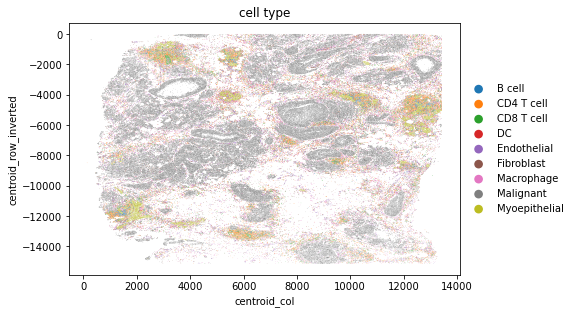

In [4]:
sc.pl.scatter(adata, x='centroid_col', y='centroid_row_inverted', color='cell_type')

In [16]:
scale_factor = .25
pseudo_small = resize(pseudo, (pseudo.shape[0] * scale_factor, pseudo.shape[1] * scale_factor),
                      anti_aliasing=False)
pseudo_small.shape

(3780, 3360, 4)

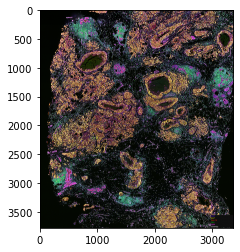

In [17]:
plt.imshow(pseudo_small)

In [30]:
adata.obsm['spatial'] = adata.obs[['centroid_col', 'centroid_row']].values
spatial_key = "spatial"
library_id = "sample"
adata.uns[spatial_key] = {library_id: {}}
adata.uns[spatial_key][library_id]["images"] = {}
adata.uns[spatial_key][library_id]["images"] = {"hires": pseudo_small}
adata.uns[spatial_key][library_id]["scalefactors"] = {"tissue_hires_scalef": .25, "spot_diameter_fullres": 20}

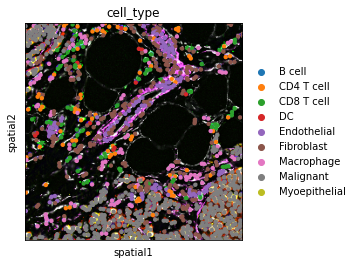

In [31]:
sc.pl.spatial(adata, color='cell_type', crop_coord=[5000, 6000, 5000, 6000])

In [32]:
# n_splits needs to be 1 or else it wont work for some reason.
# seems like theres a bug in squidpy
sq.gr.co_occurrence(adata, cluster_key="cell_type", n_splits=1, n_jobs=40)

  0%|          | 0/5886 [00:00<?, ?/s]

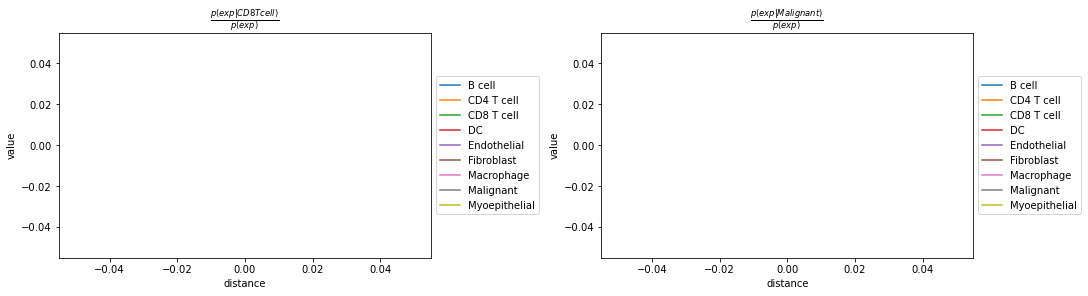

In [33]:
sq.pl.co_occurrence(
    adata,
    cluster_key="cell_type",
    clusters=["Malignant", "CD8 T cell"],
    figsize=(15, 4),
)

In [38]:
adata

AnnData object with n_obs × n_vars = 221081 × 17
    obs: 'area', 'perimeter', 'bbox_row_min', 'bbox_col_min', 'bbox_row_max', 'bbox_col_max', 'centroid_row', 'centroid_col', 'eccentricity', 'DAPI intensity max', 'CD31 intensity max', 'E-cadherin intensity max', 'CD4 intensity max', 'CD20 intensity max', 'Ki67 intensity max', 'CD68 intensity max', 'Pan-CK intensity max', 'CD8 intensity max', 'Histone H3 Pho intensity max', 'CD163 intensity max', 'Podoplanin intensity max', 'CD3 intensity max', 'CD36 intensity max', 'HIF1a intensity max', 'GLUT1 intensity max', 'GATA3 intensity max', 'CD45RO intensity max', 'CD45RA intensity max', 'SMA intensity max', 'CK19 intensity max', 'MGP intensity max', 'Vimentin intensity max', 'Maspin intensity max', 'Foxp3 intensity max', 'MMP9 intensity max', 'HLA-DR intensity max', 'CK14 intensity max', 'CD11c intensity max', 'CD44 intensity max', 'DAPI intensity min', 'CD31 intensity min', 'E-cadherin intensity min', 'CD4 intensity min', 'CD20 intensity min

In [34]:
sq.gr.spatial_neighbors(adata)
sq.gr.nhood_enrichment(adata, cluster_key="cell_type")

  0%|          | 0/1000 [00:00<?, ?/s]

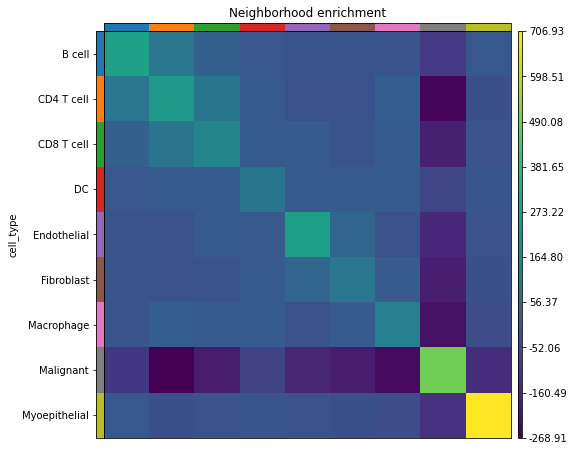

In [35]:
sq.pl.nhood_enrichment(adata, cluster_key="cell_type")

In [36]:
sq.gr.interaction_matrix(adata, cluster_key="cell_type")

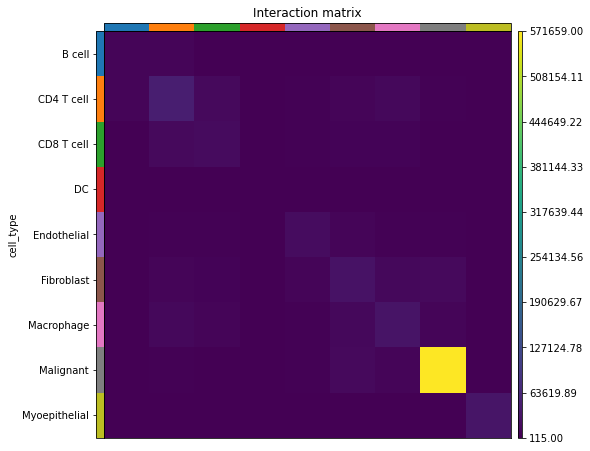

In [37]:
sq.pl.interaction_matrix(adata, cluster_key="cell_type")

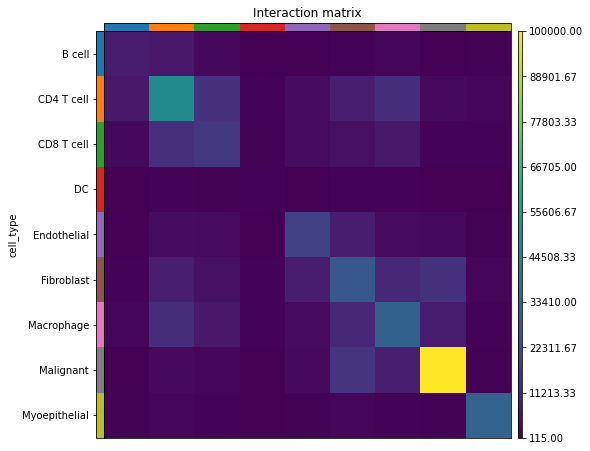

In [41]:
sq.pl.interaction_matrix(adata, cluster_key="cell_type", vmax=100000, )

In [43]:
adata.write_h5ad('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT206B1-H1/downstream_analysis/spatial_analysis.h5ad')

In [48]:
import numpy as np


In [49]:
sample_id = 'K2100253-Fs1U1'
imgcontainer_path = f"/diskmnt/Datasets/Spatial_Transcriptomics/Analysis/PKD/obj/squidpy/{sample_id}/ImgContainer_CropEqual_segmented_stardist.zarr"
img = sq.im.ImageContainer.load(imgcontainer_path)

x = np.asarray(img['segmented_stardist'].as_numpy().squeeze())

In [51]:
x.shape

(19964, 19650)

In [50]:
np.unique(x)

array([    0,     1,     2, ..., 13192, 13193, 13194], dtype=uint32)

In [52]:
from skimage.measure import label, regionprops #, regionprops_table
props = regionprops(x)

In [57]:
coord_map = {}

# THIS STEP TAKE LONG AND EAT UP MEMORY
for p in props:
    coord_map[p.label] = [int(p.centroid[0]), int(p.centroid[1])]


KeyboardInterrupt



In [53]:
p = next(iter(props))
p

In [54]:
p.label

1

In [55]:
p.centroid

(7882.015529531568, 10067.863289205703)

In [56]:
int(p.centroid[0])

7882